In [7]:
#Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Importing data

df = pd.read_csv(r'C:\Users\manon\Documents\Projets\AlexTheAnalyst - Project 1-4\movies.csv')

In [5]:
#Checking data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [23]:
#Checking percentage of missing data in columns, removing them

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
df = df.dropna()

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
yearcorrect - 0%


In [24]:
#Data types of columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int32
gross            int32
company         object
runtime        float64
yearcorrect     string
dtype: object

In [53]:
#Changing datatypes from floats to ints for budget and gross

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [67]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,690
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,189
7480,6114,4,2,2019,1468,6.9,222000.0,1433,1895,657,55,260000000,1670727580,2270,118.0,146
6653,2939,5,0,2015,1684,7.0,593000.0,507,3522,424,55,150000000,1670516444,2236,124.0,168
6043,5427,5,0,2012,2444,8.0,1300000.0,1494,2286,2192,55,220000000,1518815515,1571,143.0,244


In [68]:
#Creating correct Year column

df['yearcorrect'] = df['released'].astype('string').str[:3]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,690
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,189
7480,6114,4,2,2019,1468,6.9,222000.0,1433,1895,657,55,260000000,1670727580,2270,118.0,146
6653,2939,5,0,2015,1684,7.0,593000.0,507,3522,424,55,150000000,1670516444,2236,124.0,168
6043,5427,5,0,2012,2444,8.0,1300000.0,1494,2286,2192,55,220000000,1518815515,1571,143.0,244


In [71]:
#Ordering rows by gross, from highest to lowest

df.sort_values(by=['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,690
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,189
7480,6114,4,2,2019,1468,6.9,222000.0,1433,1895,657,55,260000000,1670727580,2270,118.0,146
6653,2939,5,0,2015,1684,7.0,593000.0,507,3522,424,55,150000000,1670516444,2236,124.0,168
6043,5427,5,0,2012,2444,8.0,1300000.0,1494,2286,2192,55,220000000,1518815515,1571,143.0,244


In [21]:
pd.set_option('display.max_rows', None)

In [72]:
#Checking for duplicates and getting rid of them

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,690
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,189
7480,6114,4,2,2019,1468,6.9,222000.0,1433,1895,657,55,260000000,1670727580,2270,118.0,146
6653,2939,5,0,2015,1684,7.0,593000.0,507,3522,424,55,150000000,1670516444,2236,124.0,168
6043,5427,5,0,2012,2444,8.0,1300000.0,1494,2286,2192,55,220000000,1518815515,1571,143.0,244


<function matplotlib.pyplot.show(close=None, block=None)>

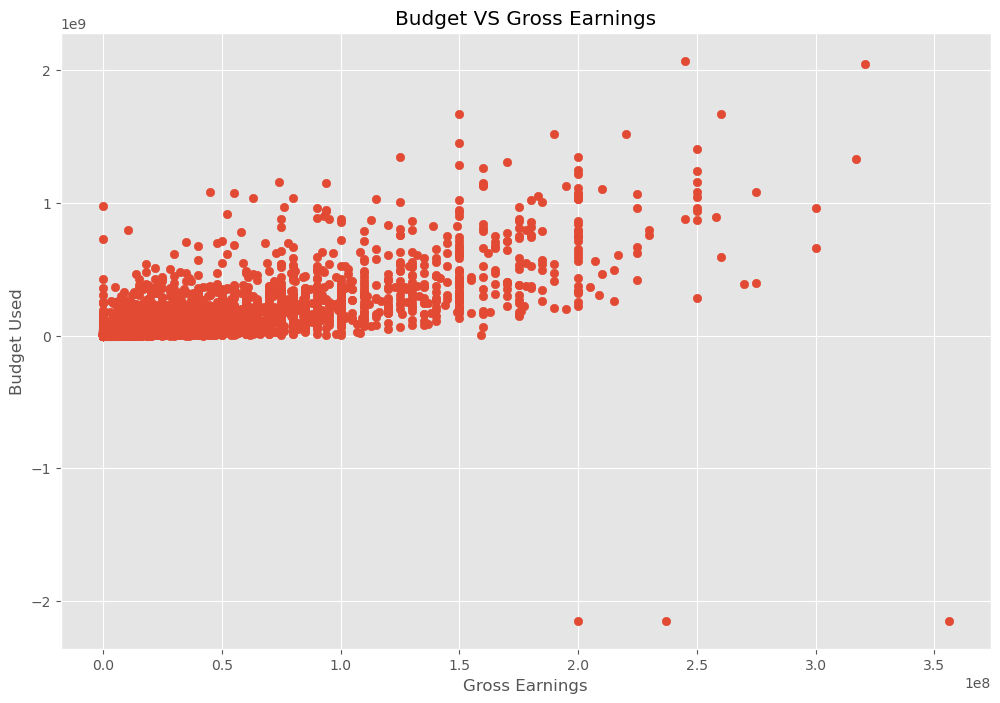

In [39]:
#Scatterplot with budget and gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget VS Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget Used')

plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

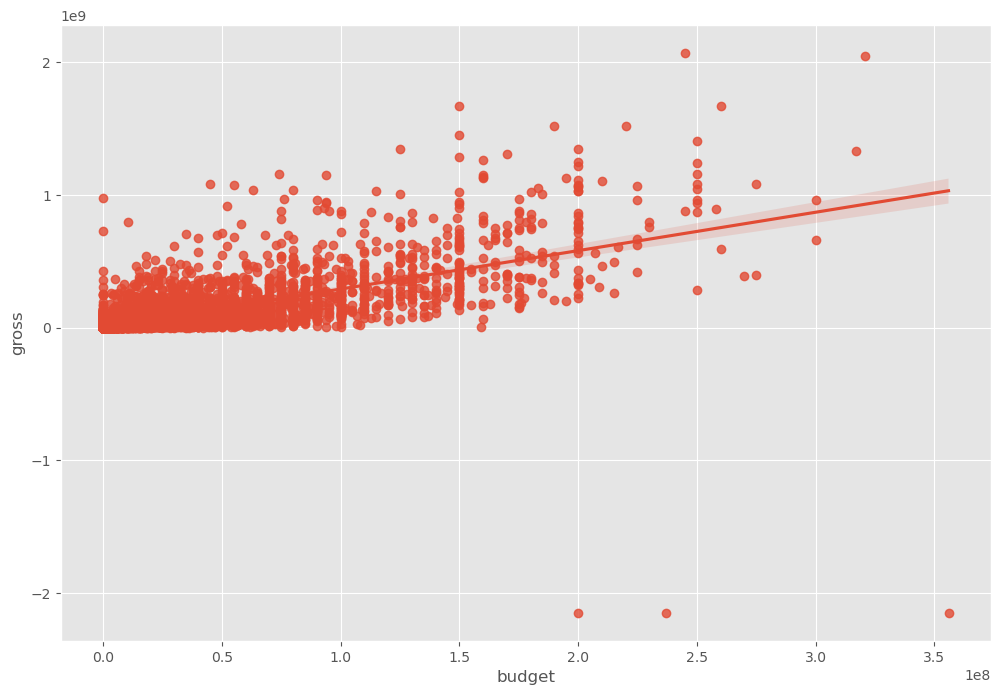

In [43]:
#Plot budget VS gross using seaborn

sns.regplot(x="budget", y="gross", data=df)

In [46]:
#Looking at correlation

df.corr(method='pearson') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.314842,0.259044,0.120676
score,0.102346,1.000000,0.411931,0.056781,0.171122,0.400574
votes,0.226895,0.411931,1.000000,0.485301,0.573871,0.309366
budget,0.314842,0.056781,0.485301,1.000000,0.687292,0.270042
gross,0.259044,0.171122,0.573871,0.687292,1.000000,0.203564
runtime,0.120676,0.400574,0.309366,0.270042,0.203564,1.000000


In [47]:
#High correlation between budget and gross

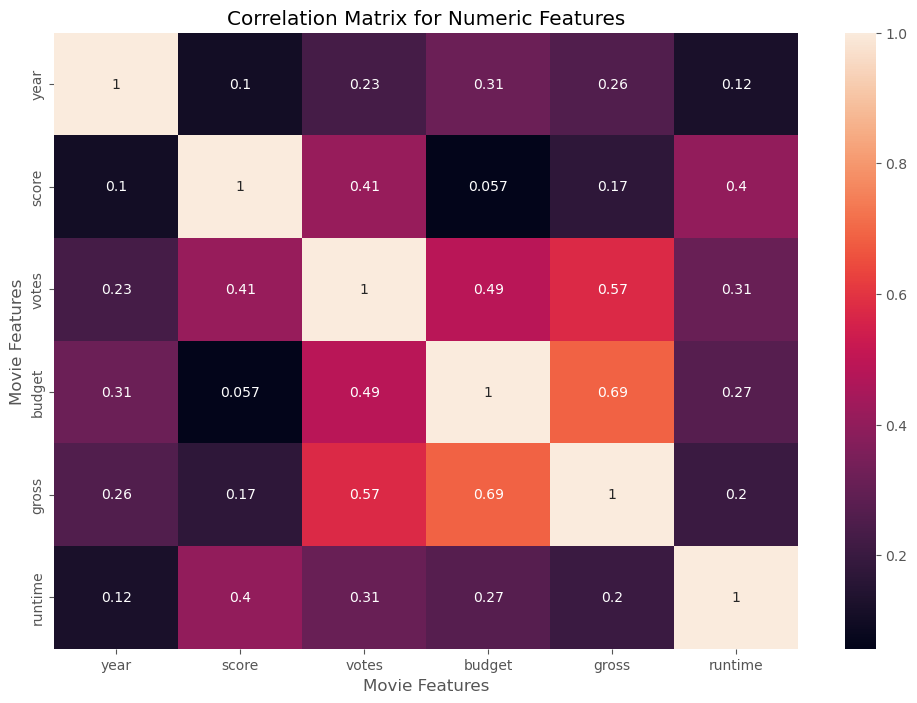

In [49]:
correlation_matrix = df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')

plt.show()

In [50]:
#Look at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dec
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apr
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,Jul
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,Jun
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,May


In [69]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,690
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,189
7480,6114,4,2,2019,1468,6.9,222000.0,1433,1895,657,55,260000000,1670727580,2270,118.0,146
6653,2939,5,0,2015,1684,7.0,593000.0,507,3522,424,55,150000000,1670516444,2236,124.0,168
6043,5427,5,0,2012,2444,8.0,1300000.0,1494,2286,2192,55,220000000,1518815515,1571,143.0,244


In [70]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0,690
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0,189
7480,6114,4,2,2019,1468,6.9,222000.0,1433,1895,657,55,260000000,1670727580,2270,118.0,146
6653,2939,5,0,2015,1684,7.0,593000.0,507,3522,424,55,150000000,1670516444,2236,124.0,168
6043,5427,5,0,2012,2444,8.0,1300000.0,1494,2286,2192,55,220000000,1518815515,1571,143.0,244


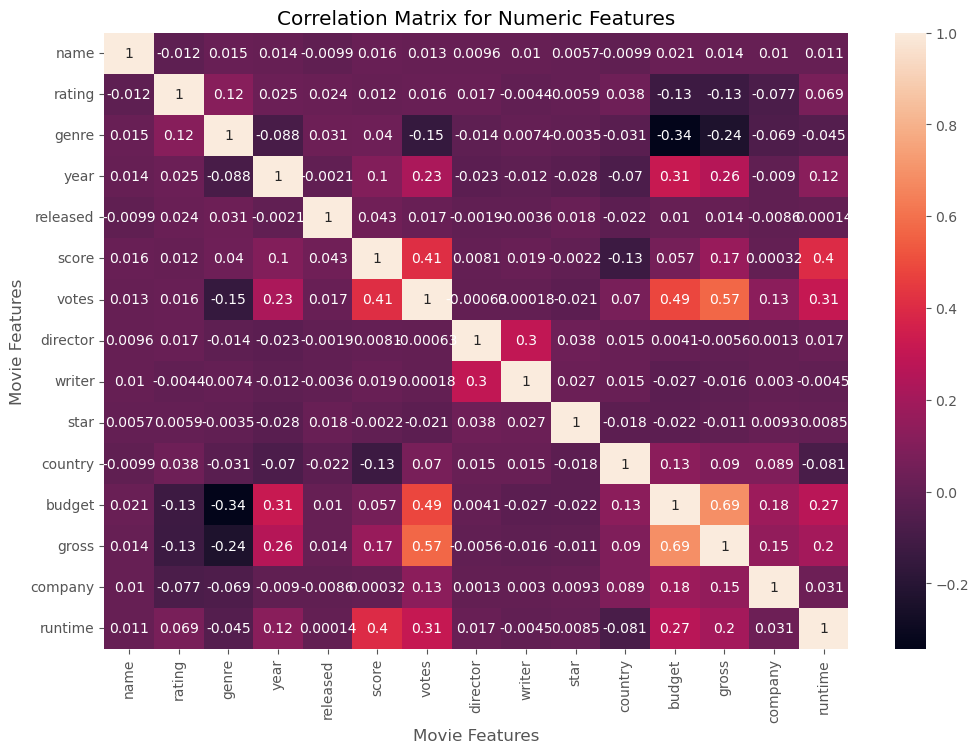

In [62]:
correlation_matrix = df_numerized.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')

plt.show()

In [63]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.013772,0.010073,0.011151
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128424,-0.076807,0.069089
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.236081,-0.068678,-0.044631
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.314842,0.259044,-0.009026,0.120676
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,0.013566,-0.008570,0.000145
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.171122,0.000316,0.400574
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.573871,0.129596,0.309366
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.005649,0.001337,0.017386
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.016380,0.003035,-0.004526
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.011032,0.009317,0.008474


In [64]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.011924
          genre       0.015300
          year        0.013514
          released   -0.009906
          score       0.016181
          votes       0.013180
          director    0.009608
          writer      0.010217
          star        0.005685
          country    -0.009939
          budget      0.020825
          gross       0.013772
          company     0.010073
          runtime     0.011151
rating    name       -0.011924
          rating      1.000000
          genre       0.117566
          year        0.024989
          released    0.024319
          score       0.011538
          votes       0.016086
          director    0.017205
          writer     -0.004387
          star        0.005905
          country     0.037738
          budget     -0.126806
          gross      -0.128424
          company    -0.076807
          runtime     0.069089
genre     name        0.015300
          rating      0.117566
        

In [65]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.342064
budget    genre      -0.342064
gross     genre      -0.236081
genre     gross      -0.236081
votes     genre      -0.148420
genre     votes      -0.148420
score     country    -0.130094
country   score      -0.130094
gross     rating     -0.128424
rating    gross      -0.128424
          budget     -0.126806
budget    rating     -0.126806
genre     year       -0.088172
year      genre      -0.088172
runtime   country    -0.081464
country   runtime    -0.081464
company   rating     -0.076807
rating    company    -0.076807
country   year       -0.070266
year      country    -0.070266
company   genre      -0.068678
genre     company    -0.068678
          runtime    -0.044631
runtime   genre      -0.044631
genre     country    -0.031485
country   genre      -0.031485
year      star       -0.027691
star      year       -0.027691
writer    budget     -0.027145
budget    writer     -0.027145
year      director   -0.022765
director  year       -0.022765
released

In [66]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross     votes       0.573871
votes     gross       0.573871
gross     budget      0.687292
budget    gross       0.687292
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Votes and Budget have the highest correlation to gross earnings